In [7]:
%config InlineBackend.figure_format = "retina"
%matplotlib inline
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20
from astroquery.vizier import Vizier
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
#from isochrones.interp import DFInterpolator
import numpy.random as random
import emcee
import corner
import random
import scipy.integrate as integrate
from scipy import interpolate
from scipy import optimize
import math as math
from astroquery.mast import Catalogs
from astroquery.gaia import Gaia
import astropy.units as u
from astropy.coordinates import SkyCoord
import multiprocessing
import os
import galpy.util.bovy_coords as bc
import astropy.coordinates as coord
import astropy.units as u

from multiprocessing import Pool
os.environ["OMP_NUM_THREADS"] = "1"
from multiprocessing import cpu_count
plt.rcParams['lines.linewidth']   =3
plt.rcParams['axes.linewidth']    = 2
plt.rcParams['xtick.major.width'] =2
plt.rcParams['ytick.major.width'] =2
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['axes.labelweight']='semibold'
plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['font.weight'] = 'semibold'
plt.rcParams['axes.titleweight']='semibold'
plt.rcParams['axes.titlesize']=9

import warnings
warnings.filterwarnings('ignore')

rerun = 1

## only run the cell below if you need to re-grab the gaia data, otherwise skip it

In [8]:
if rerun == 1:
    ## read in the information. We need:
    ## RA, Dec, plx, eplx, RV, eRV, pmra, epmra, pmdec, epmdec

    ## can this work directly from the FF input?
    file = 'KOI-3876.csv'
    neighbors=pd.read_csv(file)


    sigmaG_0 = 0.0027553202
    sigmaGBP_0 = 0.0027901700
    sigmaGRP_0 = 0.0037793818 
    ra = neighbors['RA'].values
    dec = neighbors['DEC'].values
    Gaia.MAIN_GAIA_TABLE = "gaiaedr3.gaia_source"
    g = []
    g_err = []
    bp = []
    bp_err = []
    rp = []
    rp_err = []
    plx = []
    eplx = []
    pmra = []
    epmra = []
    pmdec = []
    epmdec = []
    ruwe = []
    ii = 0
    v = Vizier(columns=["*", "+_r"], catalog="II/246")
    rad = "6s"
    width = u.Quantity(0.001, u.deg)
    height = u.Quantity(0.001, u.deg)
    print('Running',np.size(ra),'targets through Gaia')
    for r,d in zip(ra,dec):

        coord = SkyCoord(ra=r, dec=d, unit=(u.degree, u.degree), frame='icrs')
        catalog_data = Gaia.query_object_async(coordinate=coord, width=width, height=height,verbose=False)
        if np.size(catalog_data) >= 1:
            bp = np.append(bp,catalog_data['phot_bp_mean_mag'][0])
            bp_err = np.append(bp_err,(np.sqrt((-2.5/np.log(10)*catalog_data['phot_bp_mean_flux_error']/catalog_data['phot_bp_mean_flux'])**2 + sigmaG_0**2))[0])
            g = np.append(g,catalog_data['phot_g_mean_mag'][0])
            g_err = np.append(g_err,(np.sqrt((-2.5/np.log(10)*catalog_data['phot_g_mean_flux_error']/catalog_data['phot_g_mean_flux'])**2 + sigmaG_0**2))[0])
            rp = np.append(rp,catalog_data['phot_rp_mean_mag'][0])
            rp_err = np.append(rp_err,(np.sqrt((-2.5/np.log(10)*catalog_data['phot_rp_mean_flux_error']/catalog_data['phot_rp_mean_flux'])**2 + sigmaG_0**2))[0])
            plx = np.append(plx,catalog_data['parallax'][0])
            eplx = np.append(eplx,catalog_data['parallax_error'][0])
            ruwe = np.append(ruwe,catalog_data['ruwe'][0])
            pmra = np.append(pmra,catalog_data['pmra'][0])
            epmra = np.append(epmra,catalog_data['pmra_error'][0])
            pmdec = np.append(pmdec,catalog_data['pmdec'][0])
            epmdec = np.append(epmdec,catalog_data['pmdec_error'][0])


    print(np.shape(pmra),np.shape(neighbors),np.shape(neighbors['Vrerr']))
    df = pd.DataFrame({"G":g,"G_err":g_err,"BP":bp,"BP_err":bp_err,"RP":rp,"RP_err":rp_err,
                          "plx":plx,"eplx":eplx,"ruwe":ruwe,"ra":ra,"dec":dec,
                          "rv":neighbors['Vr(obs)'],"rv_err":neighbors['Vrerr'],"pmra":pmra,"pmra_err":epmra,"pmdec":pmdec,"pmdec_err":epmdec,
                          })
    df.to_pickle("koi3876.pkl")
    df

Running 1007 targets through Gaia
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query fini

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


In [93]:
neighbors

,RA,DEC,Gmag,Bp-Rp,Voff(km/s),Sep(deg),3D(pc),Vr(pred),Vr(obs),Vrerr,Plx(mas),SpT,FnuvJ,W1-W3,RUWE,XCrate,RVsrc
0,290.440629,38.523572,12.605,0.884,0.000,0.0000,0.0000,-26.79,-26.09,0.03,3.057,G7.3,NaN,0.15,0.941,NaN,Coude
1,290.469212,38.202010,18.977,2.888,3.554,0.3223,2.8781,-26.81,NaN,NaN,3.036,M3.9,NaN,NaN,0.882,NaN,None
2,289.807825,38.950421,10.829,0.561,0.478,0.6526,5.1661,-26.71,-27.03,0.18,3.024,F4.4,NaN,-0.00,0.903,NaN,Coude
3,291.280174,39.200703,14.355,1.405,4.348,0.9412,5.3773,-26.82,NaN,NaN,3.055,K4.7,NaN,NaN,1.069,NaN,None
4,290.148950,39.260789,18.451,2.998,3.806,0.7714,5.9324,-26.72,NaN,NaN,3.094,M4.1,NaN,NaN,1.102,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,299.468243,39.401043,16.216,2.351,4.928,7.0711,49.9369,-27.29,NaN,NaN,2.823,M2.5,NaN,NaN,1.496,NaN,None
1003,298.577617,35.819341,17.419,1.338,4.168,7.0218,49.9433,-27.48,NaN,NaN,2.820,K4.2,NaN,NaN,7.147,NaN,None
1004,301.429119,37.162297,19.948,1.651,4.205,8.7782,49.9542,-27.51,NaN,NaN,3.108,K5.7,NaN,NaN,1.340,NaN,None
1005,299.488085,33.760446,19.776,1.940,1.911,8.7150,49.9875,-27.59,NaN,NaN,3.155,M0.5,NaN,NaN,1.346,NaN,None


In [126]:
df = pd.read_pickle("koi3876.pkl")
#df = df[neighbors['Voff(km/s)']< 3]

print(np.shape(df))
df = df.reset_index()

df


(1007, 17)


,index,G,G_err,BP,BP_err,RP,RP_err,plx,eplx,ruwe,ra,dec,rv,rv_err,pmra,pmra_err,pmdec,pmdec_err
0,0,12.605370,0.002810,12.964232,0.003305,12.079819,0.003156,3.056519,0.009273,0.941128,290.440629,38.523572,-26.09,0.03,-4.153693,0.010347,2.269135,0.010561
1,1,18.977415,0.003597,20.582022,0.102629,17.693701,0.010783,3.036035,0.171785,0.881599,290.469212,38.202010,NaN,NaN,-2.648280,0.187804,0.423162,0.194816
2,2,10.829149,0.002763,11.037475,0.002793,10.476550,0.002763,3.023645,0.011732,0.902970,289.807825,38.950421,-27.03,0.18,-4.066180,0.012165,2.117736,0.013376
3,3,14.354888,0.002764,14.996935,0.002997,13.591921,0.002827,3.055210,0.015820,1.068964,291.280174,39.200703,NaN,NaN,-2.448428,0.017938,0.134584,0.017666
4,4,18.451443,0.003673,20.138077,0.072015,17.139994,0.010108,3.094386,0.136376,1.101582,290.148950,39.260789,NaN,NaN,-2.635165,0.164284,0.650640,0.155216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,1002,16.216158,0.003139,17.211956,0.016218,14.861000,0.015413,2.823227,0.066548,1.495707,299.468243,39.401043,NaN,NaN,-1.189683,0.075145,-0.286859,0.094798
1003,1003,17.418703,0.006172,17.823341,0.006572,16.485506,0.004475,2.819862,0.462903,7.147286,298.577617,35.819341,NaN,NaN,0.587741,0.437112,2.047691,0.501039
1004,1004,19.947598,0.006625,20.520760,0.131112,18.869598,0.034632,3.107978,0.475127,1.339983,301.429119,37.162297,NaN,NaN,-2.501483,0.522130,-0.248095,0.540541
1005,1005,19.775570,0.006517,20.315834,0.063667,18.375500,0.026555,3.154913,0.409865,1.345616,299.488085,33.760446,NaN,NaN,-0.667874,0.391096,1.677112,0.430232


[ 0.31773992  6.07786015  0.40922539 ... 13.66316701 14.18341495
 10.4777636 ] [ 0.90855117 17.10619997  1.18160222 ... 46.98883831 39.09505492
 20.23662577] [0.18845028 3.50135767 0.2591378  ... 2.42922184 1.7342065  5.02897292]


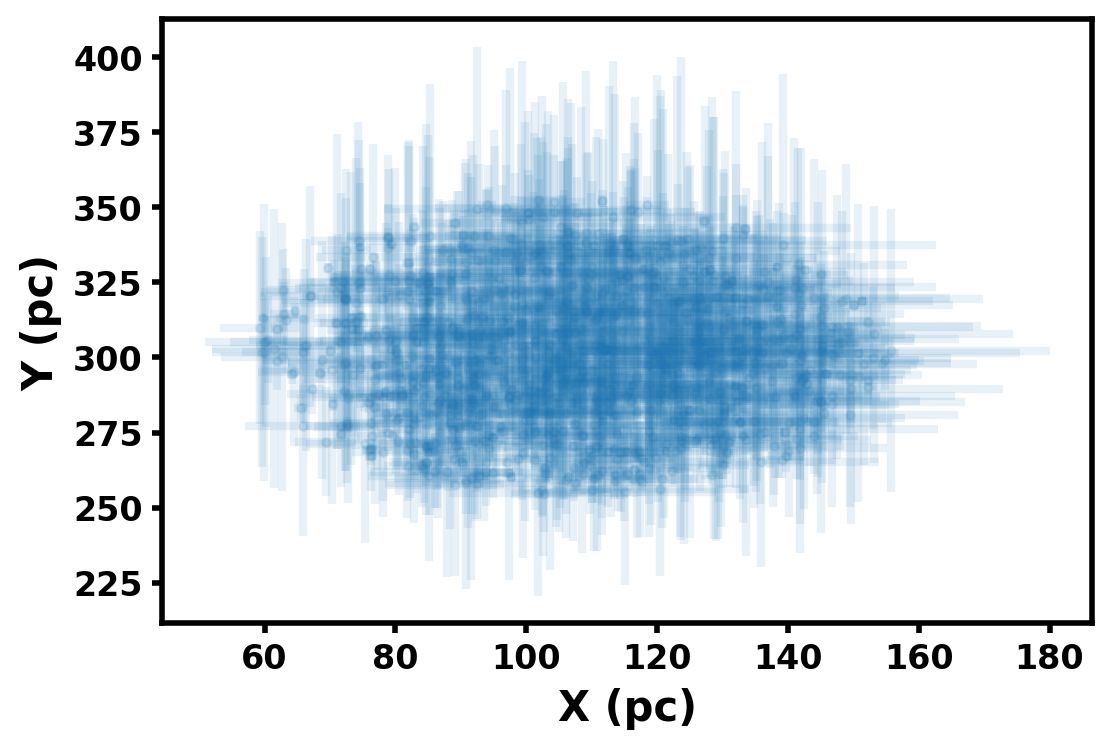

107.2581450034346 300.5095161486268 53.0095029941264


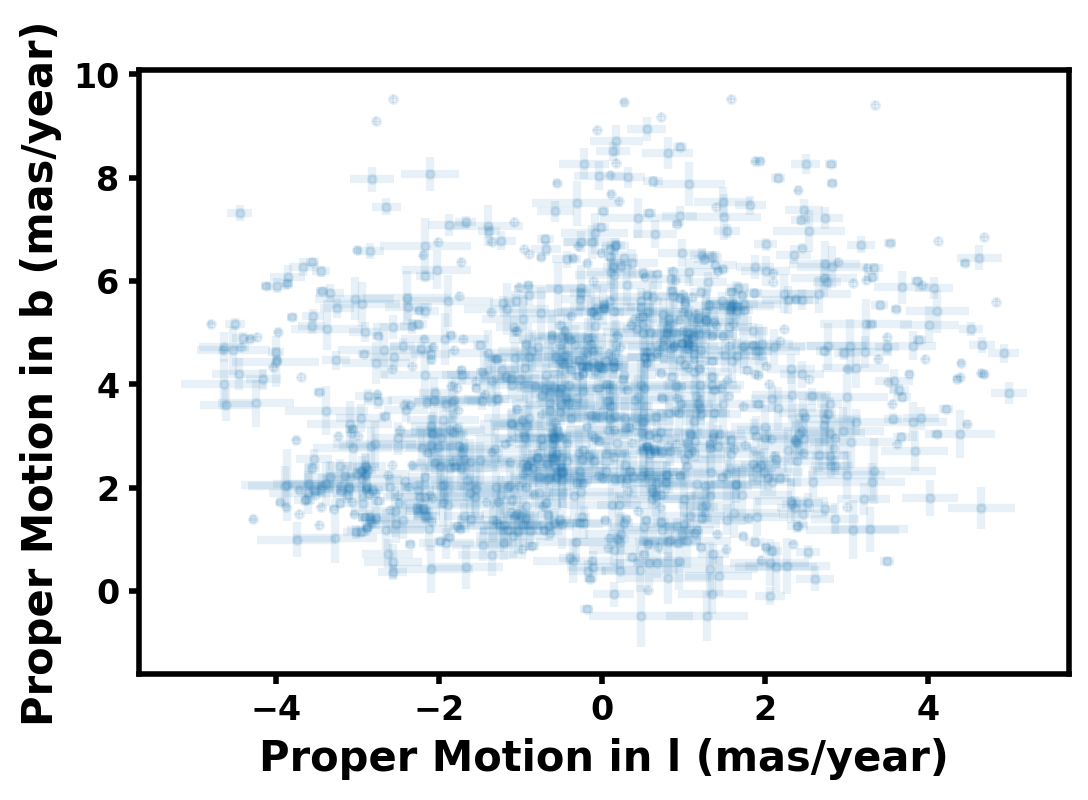

0      -26.09
1         NaN
2      -27.03
3         NaN
4         NaN
        ...  
1002      NaN
1003      NaN
1004      NaN
1005      NaN
1006      NaN
Name: rv, Length: 1007, dtype: float64


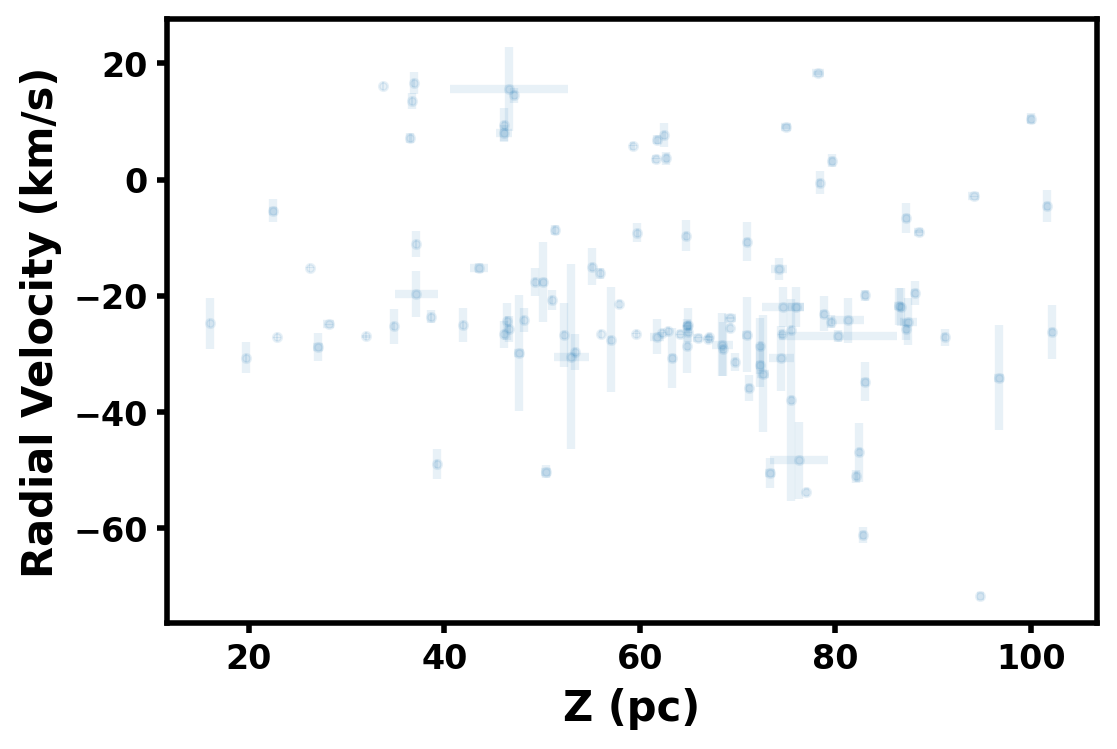

In [127]:
## this will get us the appropriate parameters for the sources and their errors

dist = 1000/df['plx']
edist = (df['eplx']/df['plx'])*dist
Gllbb = bc.radec_to_lb(df['ra'],df['dec'], degree=True)
Gxyzf = np.array(bc.lbd_to_XYZ(Gllbb[:,0] , Gllbb[:,1] , dist , degree=True))
x = (Gxyzf[0:,0])
y = (Gxyzf[0:,1])
z = (Gxyzf[0:,2])

## now get ex, ey, ez
ex = np.zeros(np.size(x))
ey = np.zeros(np.size(x))
ez = np.zeros(np.size(x))
nmonte = 10000
for i in np.arange(np.size(x)):
    d = (1000/df['plx'])[i]
    ed = (df['eplx'][i]/df['plx'][i])*d
    dist = np.random.normal(d,ed,nmonte)
    Gllbb = bc.radec_to_lb(df['ra'][i],df['dec'][i], degree=True)
    l = Gllbb[0]+np.zeros(nmonte)
    b = Gllbb[1]+np.zeros(nmonte)
    Gxyzf = np.array(bc.lbd_to_XYZ( l,b,  dist , degree=True))
    ex[i] = np.std(Gxyzf[0:,0])
    ey[i] = np.std(Gxyzf[0:,1])
    ez[i] = np.std(Gxyzf[0:,2])
    #print(ex[i],ey[i])
print(ex,ey,ez)
plt.errorbar(x,y,xerr=ex,yerr=ey,marker='.',ls='none',alpha=0.1)
plt.xlabel('X (pc)')
plt.ylabel('Y (pc)')
plt.show()



## get pml, pmb, epml, epmb for the sources
print(np.median(x),np.median(y),np.median(z))
Pllbb     = bc.radec_to_lb(df['ra'],df['dec'] , degree=True)
l = Pllbb[:,0]
b = Pllbb[:,1]
Ppmllpmbb = bc.pmrapmdec_to_pmllpmbb( df['pmra'], df['pmdec'],df['ra'],df['dec'] , degree=True )
pml = Ppmllpmbb[:,0]
pmb = Ppmllpmbb[:,1]

## now get epml, epmb
nmonte = 10000
epml = np.zeros(np.size(x))
epmb = np.zeros(np.size(x))
for i in np.arange(np.shape(df)[0]):
    pmra = np.random.normal(df['pmra'][i],df['pmra_err'][i],nmonte)
    pmdec = np.random.normal(df['pmdec'][i],df['pmdec_err'][i],nmonte)
    r = df['ra'][i]+np.zeros(nmonte)
    d = df['dec'][i]+np.zeros(nmonte)
    Ppmllpmbb = bc.pmrapmdec_to_pmllpmbb( pmra,pmdec,r,d , degree=True )
    epml[i] = np.std(Ppmllpmbb[:,0])
    epmb[i] = np.std(Ppmllpmbb[:,1])

plt.errorbar(pml,pmb,xerr=epml,yerr=epmb,marker='.',ls='none',alpha=0.1)
plt.xlabel('Proper Motion in l (mas/year)')
plt.ylabel('Proper Motion in b (mas/year)')
plt.show()   

## just get the RVs, for now let's get around the missing RV problem with a kludge solution
## assign them all the median RV with a very large error
rv = df['rv']
erv = df['rv_err']
print(rv)
ll = np.squeeze(np.where(np.isfinite(rv)))
plt.errorbar(z[ll],rv[ll],xerr=ez[ll],yerr=erv[ll],marker='.',ls='none',alpha=0.1)
plt.xlabel('Z (pc)')
plt.ylabel('Radial Velocity (km/s)')
plt.show() 


hasrv = np.squeeze(np.where(np.isfinite(rv)))
norv = np.squeeze(np.where(~np.isfinite(rv)))
rv[norv] = np.median(rv[hasrv])
erv[norv] = 10.

This is the place where we can do a full test and also see how slow this shit is.

First, define all the relevant variables that will be going into the likelihood.

In [128]:
#l, b, x, ex, y, ey, z, ez, pml, epml, pmb, epmb, rv, erv, dist, edist
dist = 1000/df['plx']
edist = (df['eplx']/df['plx'])*dist
print(np.shape(l),np.shape(b),np.shape(ex),np.shape(pml),np.shape(rv),np.shape(erv),np.shape(pmb),np.shape(epmb),np.shape(dist),np.shape(edist))

## let's get some model value guesses here to seed. 
## let's do a test where we compute the expected values for each
Pvxvyvz   = bc.vrpmllpmbb_to_vxvyvz(rv , pml , pmb , l, b, dist/1000.0 , XYZ=False , degree=True)
u = Pvxvyvz[:,0]
v = Pvxvyvz[:,1]
w = Pvxvyvz[:,2]

theta = [u[0],v[0],w[0],x[0],y[0],z[0],
         3,3,3,5,5,5,
        u[5],v[5],w[5],x[5],y[5],z[5],
        10,10,10,10,10,10,
        0.1]

um,vm,wm,xm,ym,zm,eum,evm,ewm,exm,eym,ezm,ubm,vbm,wbm,xbm,ybm,zbm,eubm,evbm,ewbm,exbm,eybm,ezbm,Pb = theta

# xm,ym,zm = x[0],y[0],z[0]
# exm,eym,ezm = 5,5,5
# um,vm,wm = u[0],v[0],w[0]
# eum,evm,ewm = 3,3,3

# xmb,ymb,zmb = x[0],y[0],z[0]
# exmb,eymb,ezmb = 10,10,10
# umb,vmb,wmb = u[0],v[0],w[0]
# eumb,evmb,ewmb = 5,5,5


## loop over all targets
modelv = np.zeros(np.size(dist))
emodelv = np.zeros(np.size(dist))
modelpml = np.zeros(np.size(dist))
emodelpml = np.zeros(np.size(dist))
modelpmb = np.zeros(np.size(dist))
emodelpmb = np.zeros(np.size(dist))

modelvb = np.zeros(np.size(dist))
emodelvb = np.zeros(np.size(dist))
modelpmlb = np.zeros(np.size(dist))
emodelpmlb = np.zeros(np.size(dist))
modelpmbb = np.zeros(np.size(dist))
emodelpmbb = np.zeros(np.size(dist))

uu = np.random.normal(um,eum,nmonte)
vv = np.random.normal(vm,evm,nmonte)
ww = np.random.normal(wm,ewm,nmonte)
uub = np.random.normal(umb,eumb,nmonte)
vvb = np.random.normal(vmb,evmb,nmonte)
wwb = np.random.normal(wmb,ewmb,nmonte)
for i in np.arange(np.size(l)):
    dd = np.random.normal(dist[i],edist[i],nmonte)
    ll = l[i] + np.zeros(nmonte)
    bb = b[i] + np.zeros(nmonte)
    model_vrpmllpmbb_big = np.array(bc.vxvyvz_to_vrpmllpmbb(uu,vv,ww,ll,bb,dd, degree=True))
    model_vrpmllpmbb_small = np.array(bc.vxvyvz_to_vrpmllpmbb(um,vm,wm,l[i],b[i],dist[i]/1000., degree=True))
    model_vrpmllpmbb_sig = np.std(model_vrpmllpmbb_big,axis=0)
    
    modelv[i] = model_vrpmllpmbb_small[0]
    emodelv[i] = model_vrpmllpmbb_sig[0]
    modelpml[i] = model_vrpmllpmbb_small[1]
    emodelpml[i] = model_vrpmllpmbb_sig[1]
    modelpmb[i] = model_vrpmllpmbb_small[2]
    emodelpmb[i] = model_vrpmllpmbb_sig[2]
    
    model_vrpmllpmbb_big = np.array(bc.vxvyvz_to_vrpmllpmbb(uub,vvb,wwb,ll,bb,dd, degree=True))
    model_vrpmllpmbb_small = np.array(bc.vxvyvz_to_vrpmllpmbb(umb,vmb,wmb,l[i],b[i],dist[i]/1000., degree=True))
    model_vrpmllpmbb_sig = np.std(model_vrpmllpmbb_big,axis=0)
    modelvb[i] = model_vrpmllpmbb_small[0]
    emodelvb[i] = model_vrpmllpmbb_sig[0]
    modelpmlb[i] = model_vrpmllpmbb_small[1]
    emodelpmlb[i] = model_vrpmllpmbb_sig[1]
    modelpmbb[i] = model_vrpmllpmbb_small[2]
    emodelpmbb[i] = model_vrpmllpmbb_sig[2]
    
# X
sigma2 = exm**2+ex**2
p_fg_x = (1-Pb) / np.sqrt(2 * np.pi * sigma2) * np.exp(-(xm - x)**2/(2 *sigma2))       
sigma2 = exbm**2+ex**2
p_bg_x = (Pb) / np.sqrt(2 * np.pi * sigma2) * np.exp(-(xmb - x)**2/(2 *sigma2))       
# Y
sigma2 = eym**2+ey**2
p_fg_y = (1-Pb) / np.sqrt(2 * np.pi * sigma2) * np.exp(-(ym - y)**2/(2 *sigma2))       
sigma2 = eybm**2+ey**2
p_bg_y = (Pb) / np.sqrt(2 * np.pi * sigma2) * np.exp(-(ymb - y)**2/(2 *sigma2))       
# Z
sigma2 = ezm**2+ez**2
p_fg_z = (1-Pb) / np.sqrt(2 * np.pi * sigma2) * np.exp(-(zm - z)**2/(2 *sigma2))       
sigma2 = ezbm**2 + ez**2
p_bg_z = (Pb) / np.sqrt(2 * np.pi * sigma2) * np.exp(-(zmb - z)**2/(2 *sigma2))  
## pml
sigma2 = emodelpml**2 + epml**2
p_fg_pml = (1-Pb) / np.sqrt(2 * np.pi * sigma2) * np.exp(-(modelpml - pml)**2/(2 *sigma2))       
sigma2 = emodelpmlb**2 + epml**2
p_bg_pml = (Pb) / np.sqrt(2 * np.pi * sigma2) * np.exp(-(modelpmlb - pml)**2/(2 *sigma2))       
##pmb
sigma2 = emodelpmb**2 + epmb**2
p_fg_pmb = (1-Pb) / np.sqrt(2 * np.pi * sigma2) * np.exp(-(modelpmb - pmb)**2/(2 *sigma2))       
sigma2 = emodelpmbb**2 + epmb**2
p_bg_pmb = (Pb) / np.sqrt(2 * np.pi * sigma2) * np.exp(-(modelpmbb - pmb)**2/(2 *sigma2))    
##RV
sigma2 = emodelv**2 + erv**2
p_fg_rv = (1-Pb) / np.sqrt(2 * np.pi * sigma2) * np.exp(-(modelv - rv)**2/(2 *sigma2))       
sigma2 = emodelvb**2 + erv**2
p_bg_rv = (Pb) / np.sqrt(2 * np.pi * sigma2) * np.exp(-(modelvb - rv)**2/(2 *sigma2)) 

output = np.sum(np.log(p_fg_x + p_bg_x + p_fg_y + p_fg_y + p_bg_z + p_bg_z + 
                           p_fg_pml + p_bg_pml + p_fg_pmb + p_bg_pmb + p_fg_rv + p_bg_rv))

print(output)


(1007,) (1007,) (1007,) (1007,) (1007,) (1007,) (1007,) (1007,) (1007,) (1007,)
-1690.4116464810343


-9.240036560650063 -25.38562643323759 2.1831364839532528
-26.09 0.22040519523839608 4.727955361236908
(-9.240036560650063, -25.38562643323759, 2.1831364839532528)
(-26.090000000000003, 0.22040519523839552, 4.727955361236908)


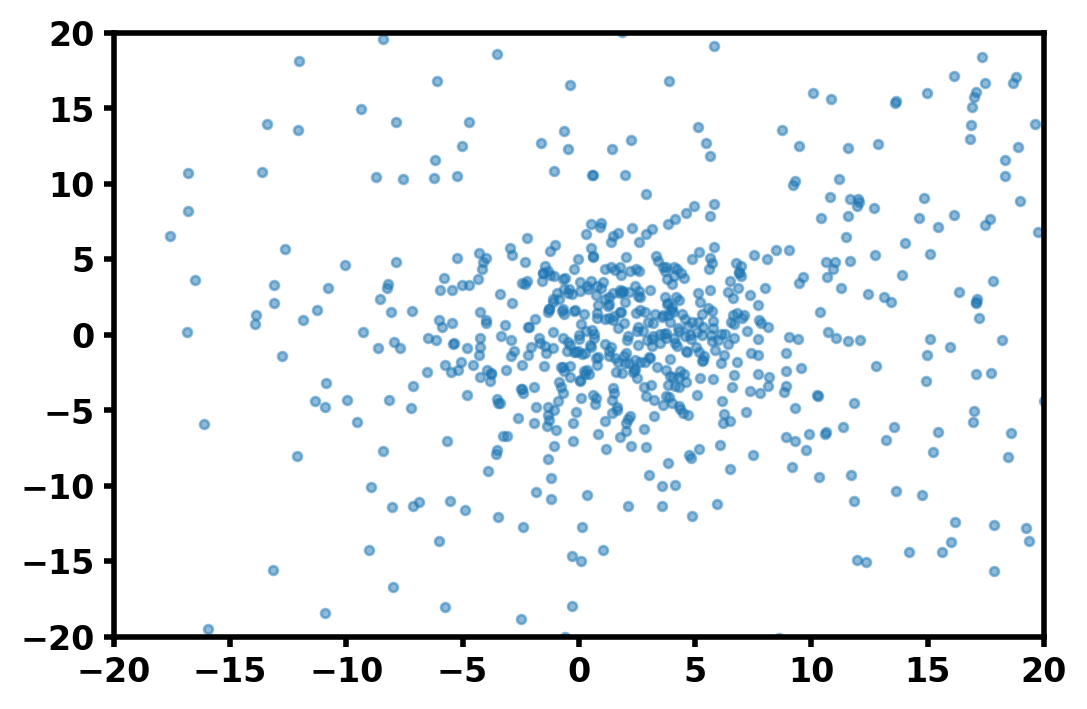

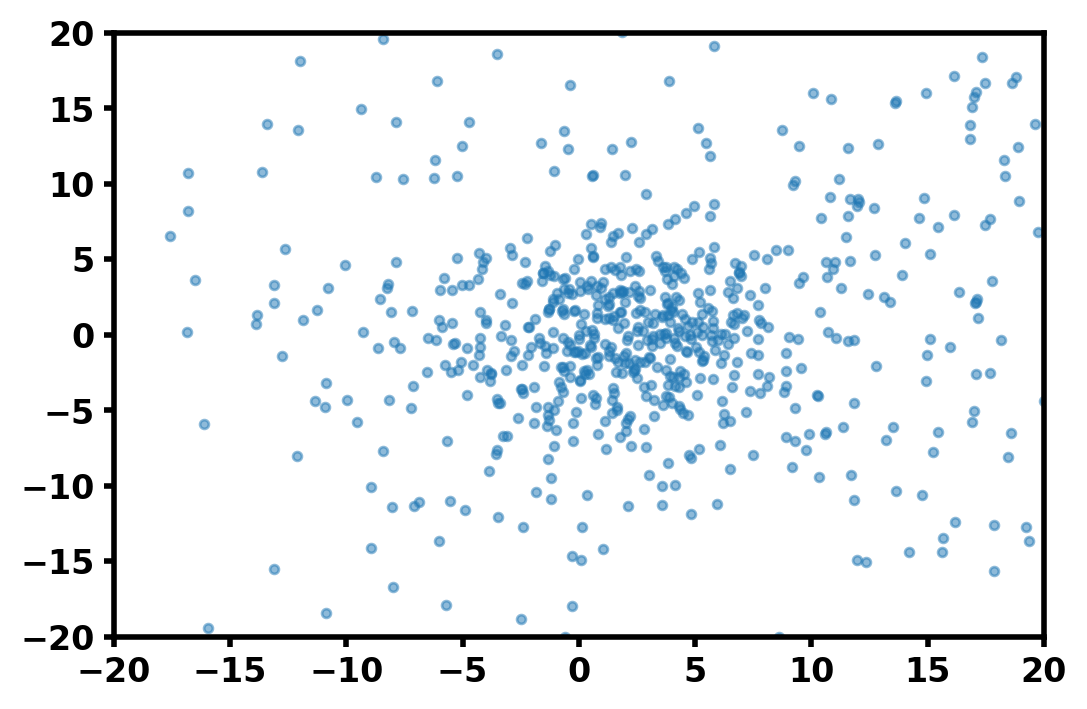

In [129]:
print(u[0],v[0],w[0])
print(rv[0],pml[0],pmb[0])

tmp = bc.vrpmllpmbb_to_vxvyvz(rv[0],pml[0],pmb[0],l[0],b[0],dist[0]/1000.,degree=True)
print(tmp)
tmp = bc.vxvyvz_to_vrpmllpmbb(tmp[0],tmp[1],tmp[2],l[0],b[0],dist[0]/1000., degree=True)
print(tmp)

# print('model pmb, pmb, model pml, pml')
# for i,j,h,k in zip(modelpmb,pmb,modelpml,pml):
#     print(i-j,h-k)
bdiff = (modelpmb - pmb)/np.sqrt(emodelpmb**2+epmb**2)
ldiff = (modelpml - pml)/np.sqrt(emodelpml**2+epml**2)
plt.scatter(bdiff,ldiff,s=10,alpha=0.5)
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.show()

bdiff = (modelpmbb - pmb)/np.sqrt(emodelpmbb**2+epmb**2)
ldiff = (modelpmlb - pml)/np.sqrt(emodelpmlb**2+epml**2)
plt.scatter(bdiff,ldiff,s=10,alpha=0.5)
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.show()

In [130]:

# nmonte = 10000
# Pllbb     = bc.radec_to_lb(neighbors['RA'][0],neighbors['DEC'][0] , degree=True)

# uu = np.random.normal(u,eu,nmonte)
# vv = np.random.normal(v,ev,nmonte)
# ww = np.random.normal(w,ew,nmonte)
# xx = np.random.normal(x,ex,nmonte)
# yy = np.random.normal(y,ey,nmonte)
# zz = np.random.normal(z,ez,nmonte)
# ll = np.zeros(nmonte)+Pllbb[0]
# bb = np.zeros(nmonte)+Pllbb[1]
# dd = np.random.normal(dist[0],0.1,nmonte)
# model_vrpmllpmbb_big = np.array(bc.vxvyvz_to_vrpmllpmbb(uu,vv,ww,ll,bb,dd, degree=True))
# model_vrpmllpmbb_small = np.array(bc.vxvyvz_to_vrpmllpmbb(u,v,w,Pllbb[0],Pllbb[1],dist[0]/1000., degree=True))
# model_vrpmllpmbb = np.median(model_vrpmllpmbb_big,axis=0)
# model_vrpmllpmbb_sig = np.std(model_vrpmllpmbb_big,axis=0)

# ## this needs to be calculated for every star
# modelv = model_lbd_small[0]
# modelpml = model_vrpmllpmbb_small[1]
# modelpmb = model_vrpmllpmbb_small[2]
# modelev = model_vrpmllpmbb_sig[0]
# modelepml = model_vrpmllpmbb_sig[1]
# modelepmb = model_vrpmllpmbb_sig[2]

# print('model rv, pml, and pmb:')
# print(modelv,modelpml,modelpmb)
# print('model erv, epml, and epmb:')
# print(modelev,modelepml,modelepmb)

# ## so for the data we need:
# ## x,y,z,ex,ey,ez
# ## pml, pmb, rv, epml, epmb, erv

# ## input:
# ## l,b,plx,eplx,pml,epml,pmb,epmb,rv,erv,u,

In [131]:
def ln_prior(theta):
    u,v,w,x,y,z,eu,ev,ew,ex,ey,ez,ub,vb,wb,xb,yb,zb,eub,evb,ewb,exb,eyb,ezb,Pb = theta
    if (eu > 0) & (ev > 0) & (ew > 0) & (ex > 0) & (ey > 0) & (ez > 0) & (eub > 0) & (evb > 0) & (ewb > 0) & (exb > 0) & (eyb > 0) & (ezb > 0) & (Pb > 0):
        return 0
    return -np.inf

def ln_likelihood(theta, l, b, x, ex, y, ey, z, ez, pml, epml, pmb, epmb, rv, erv):
        ## m for model
        ## no addon = measurement
    um,vm,wm,xm,ym,zm,eum,evm,ewm,exm,eym,ezm,ubm,vbm,wbm,xbm,ybm,zbm,eubm,evbm,ewbm,exbm,eybm,ezbm,Pb = theta
    
    ## no, feed as input the xyz measurements and their errors (all stars have a plx)
    ## then compare the model XYZ to the data XYZ
    ## for UVW, project the model UVW into model pml, model pmb, and model RV. 
        ## errors on those parameters might be tricky!
        ## ideally we should get this analytic
    
    ## there's going to be 6 p_fg + p_fg err and 6 p_bg + pb = 25 parameters
    uu = np.random.normal(um,eum,nmonte)
    vv = np.random.normal(vm,evm,nmonte)
    ww = np.random.normal(wm,ewm,nmonte)
    uub = np.random.normal(umb,eumb,nmonte)
    vvb = np.random.normal(vmb,evmb,nmonte)
    wwb = np.random.normal(wmb,ewmb,nmonte)
    i = 0
    dd = np.random.normal(dist[i],edist[i],nmonte)
    ll = l[i] + np.zeros(nmonte)
    bb = b[i] + np.zeros(nmonte)
    model_vrpmllpmbb_big = np.array(bc.vxvyvz_to_vrpmllpmbb(uu,vv,ww,ll,bb,dd, degree=True))
    model_vrpmllpmbb_small = np.array(bc.vxvyvz_to_vrpmllpmbb(um,vm,wm,l[i],b[i],dist[i]/1000., degree=True))
    model_vrpmllpmbb_sig = np.std(model_vrpmllpmbb_big,axis=0)

    modelv = model_vrpmllpmbb_small[0]
    emodelv = model_vrpmllpmbb_sig[0]
    modelpml = model_vrpmllpmbb_small[1]
    emodelpml = model_vrpmllpmbb_sig[1]
    modelpmb = model_vrpmllpmbb_small[2]
    emodelpmb = model_vrpmllpmbb_sig[2]

    model_vrpmllpmbb_big = np.array(bc.vxvyvz_to_vrpmllpmbb(uub,vvb,wwb,ll,bb,dd, degree=True))
    model_vrpmllpmbb_small = np.array(bc.vxvyvz_to_vrpmllpmbb(umb,vmb,wmb,l[i],b[i],dist[i]/1000., degree=True))
    model_vrpmllpmbb_sig = np.std(model_vrpmllpmbb_big,axis=0)
    modelvb = model_vrpmllpmbb_small[0]
    emodelvb = model_vrpmllpmbb_sig[0]
    modelpmlb = model_vrpmllpmbb_small[1]
    emodelpmlb = model_vrpmllpmbb_sig[1]
    modelpmbb = model_vrpmllpmbb_small[2]
    emodelpmbb = model_vrpmllpmbb_sig[2]
    
#     modelv = np.zeros(np.size(dist))
#     emodelv = np.zeros(np.size(dist))
#     modelpml = np.zeros(np.size(dist))
#     emodelpml = np.zeros(np.size(dist))
#     modelpmb = np.zeros(np.size(dist))
#     emodelpmb = np.zeros(np.size(dist))

#     modelvb = np.zeros(np.size(dist))
#     emodelvb = np.zeros(np.size(dist))
#     modelpmlb = np.zeros(np.size(dist))
#     emodelpmlb = np.zeros(np.size(dist))
#     modelpmbb = np.zeros(np.size(dist))
#     emodelpmbb = np.zeros(np.size(dist))
#     for i in np.arange(np.size(l)):
#         dd = np.random.normal(dist[i],edist[i],nmonte)
#         ll = l[i] + np.zeros(nmonte)
#         bb = b[i] + np.zeros(nmonte)
#         model_vrpmllpmbb_big = np.array(bc.vxvyvz_to_vrpmllpmbb(uu,vv,ww,ll,bb,dd, degree=True))
#         model_vrpmllpmbb_small = np.array(bc.vxvyvz_to_vrpmllpmbb(um,vm,wm,l[i],b[i],dist[i]/1000., degree=True))
#         model_vrpmllpmbb_sig = np.std(model_vrpmllpmbb_big,axis=0)

#         modelv[i] = model_vrpmllpmbb_small[0]
#         emodelv[i] = model_vrpmllpmbb_sig[0]
#         modelpml[i] = model_vrpmllpmbb_small[1]
#         emodelpml[i] = model_vrpmllpmbb_sig[1]
#         modelpmb[i] = model_vrpmllpmbb_small[2]
#         emodelpmb[i] = model_vrpmllpmbb_sig[2]

#         model_vrpmllpmbb_big = np.array(bc.vxvyvz_to_vrpmllpmbb(uub,vvb,wwb,ll,bb,dd, degree=True))
#         model_vrpmllpmbb_small = np.array(bc.vxvyvz_to_vrpmllpmbb(umb,vmb,wmb,l[i],b[i],dist[i]/1000., degree=True))
#         model_vrpmllpmbb_sig = np.std(model_vrpmllpmbb_big,axis=0)
#         modelvb[i] = model_vrpmllpmbb_small[0]
#         emodelvb[i] = model_vrpmllpmbb_sig[0]
#         modelpmlb[i] = model_vrpmllpmbb_small[1]
#         emodelpmlb[i] = model_vrpmllpmbb_sig[1]
#         modelpmbb[i] = model_vrpmllpmbb_small[2]
#         emodelpmbb[i] = model_vrpmllpmbb_sig[2]

    # X
    sigma2 = exm**2+ex**2
    p_fg_x = (1-Pb) / np.sqrt(2 * np.pi * sigma2) * np.exp(-(xm - x)**2/(2 *sigma2))       
    sigma2 = exbm**2+ex**2
    p_bg_x = (Pb) / np.sqrt(2 * np.pi * sigma2) * np.exp(-(xmb - x)**2/(2 *sigma2))       
    # Y
    sigma2 = eym**2+ey**2
    p_fg_y = (1-Pb) / np.sqrt(2 * np.pi * sigma2) * np.exp(-(ym - y)**2/(2 *sigma2))       
    sigma2 = eybm**2+ey**2
    p_bg_y = (Pb) / np.sqrt(2 * np.pi * sigma2) * np.exp(-(ymb - y)**2/(2 *sigma2))       
    # Z
    sigma2 = ezm**2+ez**2
    p_fg_z = (1-Pb) / np.sqrt(2 * np.pi * sigma2) * np.exp(-(zm - z)**2/(2 *sigma2))       
    sigma2 = ezbm**2 + ez**2
    p_bg_z = (Pb) / np.sqrt(2 * np.pi * sigma2) * np.exp(-(zmb - z)**2/(2 *sigma2))  
    ## pml
    sigma2 = emodelpml**2 + epml**2
    p_fg_pml = (1-Pb) / np.sqrt(2 * np.pi * sigma2) * np.exp(-(modelpml - pml)**2/(2 *sigma2))       
    sigma2 = emodelpmlb**2 + epml**2
    p_bg_pml = (Pb) / np.sqrt(2 * np.pi * sigma2) * np.exp(-(modelpmlb - pml)**2/(2 *sigma2))       
    ##pmb
    sigma2 = emodelpmb**2 + epmb**2
    p_fg_pmb = (1-Pb) / np.sqrt(2 * np.pi * sigma2) * np.exp(-(modelpmb - pmb)**2/(2 *sigma2))       
    sigma2 = emodelpmbb**2 + epmb**2
    p_bg_pmb = (Pb) / np.sqrt(2 * np.pi * sigma2) * np.exp(-(modelpmbb - pmb)**2/(2 *sigma2))    
    ##RV
    sigma2 = emodelv**2 + erv**2
    p_fg_rv = (1-Pb) / np.sqrt(2 * np.pi * sigma2) * np.exp(-(modelv - rv)**2/(2 *sigma2))       
    sigma2 = emodelvb**2 + erv**2
    p_bg_rv = (Pb) / np.sqrt(2 * np.pi * sigma2) * np.exp(-(modelvb - rv)**2/(2 *sigma2)) 

    output = np.sum(np.log(p_fg_x + p_bg_x + p_fg_y + p_fg_y + p_bg_z + p_bg_z + 
                               p_fg_pml + p_bg_pml + p_fg_pmb + p_bg_pmb + p_fg_rv + p_bg_rv))
    if np.isfinite(output):
        return output
    else:
        return -np.inf
    
def ln_posterior(theta, l, b, x, ex, y, ey, z, ez, pml, epml, pmb, epmb, rv, erv):
    
    ln_p = ln_prior(theta)
    if not np.isfinite(ln_p):
        return -np.inf
    return ln_p + ln_likelihood(theta, l, b, x, ex, y, ey, z, ez, pml, epml, pmb, epmb, rv, erv)



In [132]:
ln_posterior(theta, l, b, x, ex, y, ey, z, ez, pml, epml, pmb, epmb, rv, erv)

-1911.6254151194016

In [133]:
initial_guesses = theta
ndim = np.size(initial_guesses)
pos0 = []
counter = 0
randomizer = 0.01+np.zeros(25)
nwalkers = ndim*5

while len(pos0) < nwalkers:
    counter+=1
    if counter > 5000:
        print('failed to initialize walkers, check the initial conditions and/or input data')
        break 
    trial = initial_guesses + randomizer * np.random.randn(ndim)
    lp = ln_posterior(trial,l, b, x, ex, y, ey, z, ez, pml, epml, pmb, epmb, rv, erv)
    #print(lp)
    if np.isfinite(lp):
        pos0.append(trial)


-1913.0996578897432
-1912.3635394230105
-1913.9128216551444
-1911.7851525909778
-1911.6021663965084
-1912.2414806604488
-1908.8355515658786
-1909.8326312491733
-1911.9294055660753
-1913.7420705209072
-1915.2921922671426
-1914.3896068881545
-1910.786993720736
-1913.270057746372
-1910.6775400056383
-1917.2513441479073
-1913.083724245072
-1914.4527755618092
-1916.469151057152
-1915.279537053821
-1909.5800718116038
-1912.2515004805196
-1911.937736716906
-1914.3829420428428
-1914.3911793746001
-1909.1497743173568
-1908.5947187688225
-1908.6223429530073
-1910.579971388753
-1912.681469775675
-1919.5648250552351
-1913.4479456284525
-1913.2989116820042
-1908.8364293426291
-1911.9501191308868
-1906.511583409403
-1912.8716784167134
-1908.7353999003278
-1913.3484317508946
-1917.1895787788915
-1914.6516213123055
-1914.4548609906678
-1911.3491587452568
-1910.7367967126936
-1915.993805774751
-1912.9234666150205
-1915.5683426157148
-1907.4040909952432
-1913.4267050853705
-1910.8757382424612
-1910.4909

In [134]:
nsteps = 1000
filename = "mix_group_backend1.h5"
backend = emcee.backends.HDFBackend(filename)
os.system("rm "+filename)

sampler = emcee.EnsembleSampler(nwalkers, ndim, ln_posterior, backend=backend, 
                                args=(l, b, x, ex, y, ey, z, ez, pml, epml, pmb, epmb, rv, erv), threads=8)
print('Running MCMC:')
sampler.run_mcmc(pos0, nsteps, progress=True)

Running MCMC:


100%|██████████| 1000/1000 [15:53<00:00,  1.05it/s]


State([[-4.80680114e+92  2.81709229e+93 -7.89840570e+92 ...  1.46690404e+93
   2.54481195e+93  1.44478698e+92]
 [-2.49540345e+92  1.46246391e+93 -4.10037444e+92 ...  7.61527742e+92
   1.32111227e+93  7.50045714e+91]
 [-4.44706164e+93  2.60626390e+94 -7.30729689e+93 ...  1.35712251e+94
   2.35436093e+94  1.33666087e+93]
 ...
 [-1.18380899e+92  6.93790008e+92 -1.94520962e+92 ...  3.61267446e+92
   6.26733361e+92  3.55820738e+91]
 [-1.21203774e+93  7.10329945e+93 -1.99158333e+93 ...  3.69879831e+93
   6.41674305e+93  3.64302851e+92]
 [-2.41332077e+92  1.41436082e+93 -3.96550572e+92 ...  7.36479857e+92
   1.27765872e+93  7.25375763e+91]], log_prob=[210789.43237584 210127.17267357 213017.17602355 211749.23215001
 210469.32699641 211451.21928395 210982.95615205 211676.03767254
 211757.57498766 212205.76944101 211139.30776925 209596.80352355
 212589.41078385 212917.97331424 210282.35605139 211548.03302769
 213303.97796774 211205.66852386 210914.47188732 211529.1902828
 211162.54539445 211239.

In [ ]:
# filename = foldername+'/'+"mix_group_backend1.h5"
# backend = emcee.backends.HDFBackend(filename)
# os.system("rm "+filename)

# max_n = 100000
# sampler = emcee.EnsembleSampler(nwalkers, ndim, ln_posterior, backend=backend, 
#                                 args=(fittype, mag1corr, mag2corr, magcorr, modelgrp, modelage, modelmag, modelcol,col1, mag1, colerr1, magerr1), threads=8)
# # We'll track how the average autocorrelation time estimate changes
# index = 0
# autocorr = np.empty(max_n)

# # This will be useful to testing convergence
# old_tau = np.inf

# # Now we'll sample for up to max_n steps
# for sample in sampler.sample(pos0, iterations=max_n, progress=True):
#     # Only check convergence every 5000 steps
#     if sampler.iteration % 5000:
#         continue

#     # Compute the autocorrelation time so far
#     # Using tol=0 means that we'll always get an estimate even
#     # if it isn't trustworthy
#     tau = sampler.get_autocorr_time(tol=0)
#     autocorr[index] = np.mean(tau)
#     index += 1

#     # Check convergence
#     converged = np.all(tau * 50 < sampler.iteration)
#     converged &= np.all(np.abs((old_tau - tau) / tau) < 0.15)
#     if converged:
#         break
#     else:
#         print(np.max(tau*50)//1,sampler.iteration,(100*np.max(np.abs(old_tau - tau) / tau))//1 )
#     old_tau = tau
    
# #sampler.run_mcmc(pos0, nsteps, progress=True)
# print('done with mcmc')

In [ ]:
## plotting!!!
burn = sampler.iteration//5
samples = sampler.get_chain(discard=burn)
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
labels = [r'Age (Myr)',r'$E(B-V)$', r'$P_B$',r'$Y_B$ (mag)',r'$V_B$ (mag$^{2}$)','f (mag)']
for i in range(ndim):
     ax = axes[i]
     ax.plot(samples[:, :, i], "k", alpha=0.3)
     ax.set_xlim(0, len(samples))
     ax.set_ylabel(labels[i])
     ax.yaxis.set_label_coords(-0.1, 0.5)
        
fig.set_rasterized(True)
fig.savefig(foldername+'/walker'+file_endian+'.pdf',dpi=400)

          
## check the autocorrelation time (this is to check for convergence)
tau = sampler.get_autocorr_time(tol=0)
#print('Tau for each parameter. If any are >', nsteps//50,' then run a longer chain.')
if np.any(tau > nsteps//30):
    print('You need to run a longer chain')
    print(np.max(tau),nsteps//30)
    log.write('You need to run a longer chain:\n')
    log.write(str(np.max(tau))+','+str(nsteps//50))
else:
    print('Chain at least 50x the autocorrelation time.',int((np.max(tau)*50)//1),nsteps)
    log.write('Chain at least 50x the autocorrelation time. '+str(int((np.max(tau)*50)//1))+' '+str(nsteps)+'\n')
    
## flatten (i.e., dump the separate walkers)
flat_samples = sampler.get_chain(discard=burn, thin=5, flat=True)
randomizer = np.random.normal(0,2,np.size(flat_samples[:,0]))
flat_samples[:,0] = flat_samples[:,0] + randomizer

fig = corner.corner( 
    flat_samples,show_titles=True, labels=labels,range=[0.9995,0.9995,0.9995,0.9995,0.9995,0.9995],
    smooth=1,quantiles=(0.16, 0.84),
    fill_contours=True, plot_datapoints=False,title_kwargs={"fontsize": 11},title_fmt='.3f',
    hist_kwargs={"linewidth": 2.5},levels=[(1-np.exp(-0.5)),(1-np.exp(-2)),(1-np.exp(-4.5))]
);
plt.savefig(foldername+'/corner'+file_endian+'.pdf',dpi=400)


from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    log.write(txt + '\n')
    display(Math(txt))

## identify the FPs

## this is detailed in DFM's guide, he uses "blob" which I could not get to work
## the basic idea is that we pull out a random set of fit parameters from the mcmc, assign the 
## resulting outlier probs to each point, and save those to post_prob (cumulative). Then divide by the
## total number of random samples we pulled. This gives us the "average" probability that a star is a
## member. 

    
##Note that "outliers" are mostly non-members, but because the models are not perfect, could easily
## just be stars where the models failed
## I had initially hoped this would also catch the binaries, but that does not appear to be happening.
## Instead, the code is handling the binaries by increasing "f" to include most of the binary population.
## this means that the age is probably underestimated. I don't have a simple solution for this right now. 
## we might have to explicitly model the binaries or force f to be smaller. 
norm = 0.0
post_prob = np.zeros(len(col1))
elements = 2000

# col1 = np.array(col[good])
# mag1 = np.array(mag[good])
# colerr1 = np.array(colerr[good])
# magerr1 = np.array(magerr[good])
# ra1 = np.array(ra[good])
# dec1 = np.array(dec[good])
# ruwe1 = np.array(ruwe[good])
# mask = np.ones(len(data), np.bool)
for i in range(elements):
    index = random.randrange(0, np.size(flat_samples[:,0])-1)
    age,EBV, Pb,Yb,Vb,sys = flat_samples[index,:]
    
    l = np.squeeze(np.where(np.abs(modelage-age) == np.min(np.abs(modelage-age))))
    redcol = modelcol[l]+EBV*(mag1corr(modelgrp[l])-mag2corr(modelgrp[l]))
    redmag = modelmag[l]+EBV*magcorr(modelgrp[l])
    f = interpolate.interp1d(redcol,redmag,fill_value='extrapolate')
    mag_predict = f(col1)
    mag_predict2 = f(col1+colerr1)
    err2 = np.abs(mag_predict2-mag_predict)

    sigma2 = magerr1**2+(err2*2)**2+sys**2
    p_fg = ((1-Pb) / np.sqrt(2 * np.pi * sigma2)) * np.exp(-(mag1-mag_predict)**2/(2 * sigma2))
    if fittype == 'hybrid':
        f = interpolate.interp1d(modelcol[l],modelmag[l],fill_value='extrapolate')
        mag_predict_nored = f(col1)
        p_bg = (Pb / np.sqrt(2 * np.pi * (Vb + sigma2))) * np.exp(-((mag1-mag_predict_nored)-Yb)**2/(2 * (Vb + sigma2)))        
    if fittype == 'binary':
        p_bg = (Pb / np.sqrt(2 * np.pi * (Vb + sigma2))) * np.exp(-((mag1-mag_predict)-Yb)**2/(2 * (Vb + sigma2)))
    if fittype == 'normal':
        p_bg = (Pb / np.sqrt(2 * np.pi * (Vb + sigma2))) * np.exp(-(mag1-Yb)**2/(2 * (Vb + sigma2)))
    ll_fg = np.log(p_fg)
    ll_bg = np.log(p_bg)
    adder = np.exp(ll_fg - np.logaddexp(ll_fg, ll_bg))
    ll = np.where(~np.isfinite(adder))
    if np.size(ll) > 0:
        adder[ll] = 0
    post_prob += adder
#     if i == 0:
#         for jj,kk,ll,mm in zip(mag1,mag_predict,sigma2,np.exp(ll_fg - np.logaddexp(ll_fg, ll_bg))):
#             print(jj,kk,np.sqrt(ll),(jj-kk)/np.sqrt(ll),mm)

post_prob/=elements
outliers = np.where(post_prob < 0.5)##50% chance of being outliers

 
targsize = 200
## Take out the fit parameters. Note I'm lazily using median=best-fit, which is fine for 
## such a simple relation, but not necessarily OK generally. To get the best fit, use the likelihood
## values from the MCMC chain (check emcee docs).
params = np.array([0.,0.,0.,0.,0.,0.])
for i in range(ndim):
    params[i] = np.percentile(flat_samples[:, i],[50])
    age, EBV, Pb, Yb, Vb, sys = params


fig,ax1 = plt.subplots(figsize=(9,5))
## another way to do this is to color the points by outlier prob to see how the weighting works out
ec = ax1.scatter(col1,mag1,c=1.-post_prob,vmin=0.0 , vmax=1 , cmap='gray',s=40,zorder=3,alpha=0.9)
cb = plt.colorbar(ec , ax=ax1)
ax1.scatter(col1,mag1,marker='.',edgecolors='blue',facecolors='none',s=100,label='Stars included in model',zorder=3,alpha=0.5)
if np.size(col2) > 1:
    l = np.where(np.abs(col2)>0.01)
    ax1.scatter(col2[l],mag2[l],marker='s',edgecolors='royalblue',alpha=0.5,s=20,label='Stars excluded from model',zorder=0)
cb.set_label(label='MCMC outlier probability',fontsize=14)
    
elements2 = 100
for i in range(elements2):
    index = random.randrange(0, np.size(flat_samples[:,0])-1)
    age,EBV, Pb,Yb,Vb,sys = flat_samples[index,:]
    l = np.squeeze(np.where(np.abs(modelage-age) == np.min(np.abs(modelage-age))))
    redcol = modelcol[l]+EBV*(mag1corr(modelgrp[l])-mag2corr(modelgrp[l]))
    redmag = modelmag[l]+EBV*magcorr(modelgrp[l])
    ax1.plot(redcol,redmag,label='_Model',color='green',alpha=1/elements2,zorder=5)
ax1.plot([0],[0],label='Model Samples',color='green',alpha=1)
ax1.scatter(targcol,targmag,marker='*',s=120,label=targname,color='red',zorder=6)
ax1.legend(fontsize=13)
ax1.set_xlabel(xlabel , fontsize=16)
ax1.set_ylabel(ylabel, fontsize=16)
ax1.set_xlim(colrange[0],colrange[1])
ax1.set_ylim(magrange[0],magrange[1])
## temporary
if usecol == 'bprp':
    ax1.set_xlim(-0.1,4.0)
    ax1.set_ylim(11.8,0.1)
if usecol == 'grp':
    ax1.set_xlim(-0.1,1.45)
    ax1.set_ylim(11.8,0.1)
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
if usecol == 'bprp':
    spttickvals = np.array([ -0.037 , 0.377 , 0.782 , 1.10 , 1.84 , 2.50 , 3.35 , 4.65 ])
if usecol == 'grp':
    spttickvals = np.array([ -0.020 , 0.230 , 0.439 , 0.62 , 0.92 , 1.13 , 1.33 , 1.52 ])  
sptticklabs = np.array([ 'A0' , 'F0' , 'G0' , 'K2' , 'M0' , 'M3' , 'M5' , 'M7' ])
xx = np.where( (spttickvals >= colrange[0]) & (spttickvals <= colrange[1]))
ax2.set_xticks(spttickvals[xx])
ax2.set_xticklabels( sptticklabs[xx] )
ax2.set_xlabel('Spectral Type' , fontsize=16, labelpad=15)
ax2.tick_params(axis='both',which='major',labelsize=12)
fig.savefig(foldername+'/CMDcoloroutlier'+file_endian+'.pdf',dpi=400, bbox_inches='tight')

##write the results to a file

## write to a file the rejected sources for manual inspection:
prob_out = foldername+'/Probs_'+file_endian+'.txt'
##   RA, Dec, g, Bp, Rp, Mag, Col, Ruwe
fmt1 = "%11.7f %11.7f %6.3f %6.3f %6.3f"
os.system('rm '+prob_out)
prob = open(prob_out,'x')
prob.write('RA           DEC          color  Mg   Prob  \n')
for i in np.arange(np.size(ra1)):
    j = int(np.squeeze(i))
    prob.write(fmt1 % (ra1[j],dec1[j],col1[j],mag1[j],post_prob[j]))
    prob.write("\n")
    
prob.close()


In [ ]:
targcol,targmag
#print(sigma2,np.sqrt(sigma2))
# np.shape(ll_fg)
# np.shape(ll_bg)
# np.shape(np.logaddexp(ll_fg, ll_bg))
# print(np.shape(post_prob))
# print(np.shape(sigma2))
#print(np.max(col))

# ### temporary
# flat_samples = sampler.get_chain(discard=burn, thin=5, flat=True)
# fig = corner.corner( 
#     flat_samples[:,0:5],show_titles=True, labels=labels[0:5],range=[0.995,0.995,0.999,0.999,0.999],
#     smooth=1,
#     fill_contours=True, plot_datapoints=False,title_kwargs={"fontsize": 11},title_fmt='.3f',
#     hist_kwargs={"linewidth": 2.5},levels=[(1-np.exp(-0.5)),(1-np.exp(-2)),(1-np.exp(-4.5))]
# );
# plt.savefig(foldername+'/corner'+file_endian+'_nof.pdf',dpi=400)
# #############